# Sobre la tarea anterior
En la tarea anterior, no se consideró correctamente la clase a la que pertenecía cada corpus, lo que llevó a un enfoque incompleto. Para corregirlo, se ha repetido el proceso siguiendo los mismos pasos, pero ahora incluyendo explícitamente la clase correspondiente. Esto asegura que todos los elementos y procedimientos se ajusten al contexto adecuado.

Lo que se ha reutilizado en la tarea es el proceso de eliminación de las cabeceras, ya que se han introducido directamente los ficheros modificados sin necesidad de realizar esa parte del trabajo nuevamente.

## Importación de los corpus sin las cabeceras.
A continuación, se establece la estructura necesaria para acceder a nuestros corpus. Para ello, crearemos un array que contendrá las rutas correspondientes a cada archivo.

In [1]:
import os
path = os.getcwd() + "/Corpus-representacion"
# Obtener el listado
listado = os.listdir(path)
corpus_dir = [] # Guardamos el directorio para cada fichero
for elemento in listado:
    corpus_dir.append(path +'/'+elemento)

all_corpus_files = []
for dir in corpus_dir:
    corpus_files = os.listdir(dir)
    for corpus in corpus_files:
        all_corpus_files.append(dir +'/'+corpus)

Definimos una función para leer el contenido de un fichero.

In [3]:
def read_file(ruta_fichero):
    """
    Lee el contenido de un fichero de texto y lo retorna como un string único.
    
    Args:
        ruta_fichero (str): Ruta al archivo de texto.
        
    Returns:
        str: Contenido completo del fichero como una única cadena.
    """
    try:
        with open(ruta_fichero, 'r', encoding='utf-8') as fichero:
            contenido = fichero.read()
        return contenido
    except FileNotFoundError:
        return "Error: El fichero no se encuentra."
    except Exception as e:
        return f"Error: {e}"

A continuación, crearemos un DataFrame que asocie cada corpus con su clase correspondiente, identificada por el nombre de la carpeta a la que pertenece. Para ello, utilizaremos una variable llamada **listado**, que contiene los nombres de todas las clases.

In [53]:
print(listado)

['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'rec.sport.hockey', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns']


Ahora iteraremos sobre cada archivo disponible para construir nuestro DataFrame. Utilizando las rutas almacenadas en **all_corpus_files**, verificaremos a qué clase pertenece comparando con los nombres de las clases. De esta manera, podremos asociar cada archivo con su clase correspondiente.

In [4]:
data = []
for corpus in all_corpus_files:
    for tema in listado:
        if tema in corpus:
            data.append((read_file(corpus), tema))
            break

Finalmente, creamos nuestro DataFrame utilizando la biblioteca pandas.

In [5]:
import pandas as pd
df = pd.DataFrame(data, columns=['content', 'class'])
df.shape

(805, 2)

# Preprocesamiento
En este apartado se aplican los mismos filtros que en la tarea 3, pero se generara un dataframe que a cada elemento le correspondera una classe. 

In [6]:
df['content'][0]

'Message-ID: <FLAX.93Apr6125933@frej.teknikum.uu.se>References: <1993Mar30.142700.543@vms.huji.ac.il> <FLAX.93Apr3142133@frej.teknikum.uu.se><FLAX.93Apr5224449@frej.teknikum.uu.se><1993Apr5.221759.28472@thunder.mcrcim.mcgill.edu>NNTP-Posting-Host: frej.teknikum.uu.seIn-reply-to: hasan@McRCIM.McGill.EDU \'s message of Mon, 5 Apr 93 22:17:59 GMTIn article <1993Apr5.221759.28472@thunder.mcrcim.mcgill.edu> hasan@McRCIM.McGill.EDU  writes:[ stuff deleted ]|> I wrote:|> Are you calling names, or giving me a title? If the first, read your|> paragraph above, if not I accept the title, in order to let you get into the|> um, well, debate again.Hasan replies:I didnot know that "Master of wisdom" can be "name clling" too,unless you consider yourself deserve-less !Unless you are referring to someone else, you have in fact given me a nameI did not ask for, hence the term \'name calling\'.Hasan writes:|>    So what do you expect me to tell you to tell you, Master of Wsidom,|> \t\t\t\t\t\t\t       ^^^

In [55]:
import re
import nltk
from nltk.corpus import words as nltk_words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
# nltk.download('words')

valid_words = set(nltk_words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def convert_string_to_array(string_to_convert):
    # Dividir la cadena en palabras, eliminando espacios en blanco
    return [word for word in string_to_convert.split(' ') if word]

def remove_all_words_that_contain_numbers(list_of_words):
    # Verifica que cada elemento en la lista no contenga números
    return [word for word in list_of_words if not re.search(r'\d', word)]

def filter_word_by_lenght(list_of_words):
    exceptions = ['i', 'a']
    return [word for word in list_of_words if 2 <= len(word) <= 15 or word in exceptions]

def filter_stop_words(list_of_words):
    filtered_bag_of_words = []
    for word in list_of_words:
        if word not in stop_words:
            filtered_bag_of_words.append(word)
    return filtered_bag_of_words

def word_exists(list_of_words):
    return [word for word in list_of_words if word in valid_words or word == '@@@']

def array_to_string(list_of_words):
    return ' '.join(list_of_words)

# Función para mapear tipos gramaticales
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def apply_lemmatizer(list_of_words):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in list_of_words]

def preproces(data):
    preproces_data = convert_string_to_array(data)
    preproces_data = remove_all_words_that_contain_numbers(preproces_data)
    preproces_data = filter_word_by_lenght(preproces_data)
    preproces_data = word_exists(preproces_data)
    preproces_data = filter_stop_words(preproces_data)
    preproces_data = apply_lemmatizer(preproces_data)
    return array_to_string(preproces_data)

Este es un ejemplo del preprocesamiento que estamos llevando a cabo. Se ha definido un string de prueba **test**, que contiene algunas palabras presentes en nuestro corpus y otras que no, simulando casos similares. Para más detalles sobre este procedimiento, se puede consultar la **Tarea 3**, donde se explica este procesamiento de manera más detallada.

In [54]:
test = "hello smaller macia2345 going gone asdfasdf45 god afternoon a i m"
test = convert_string_to_array(test)
test = remove_all_words_that_contain_numbers(test)
test = filter_word_by_lenght(test)
test = word_exists(test)
test = apply_lemmatizer(test)
test = array_to_string(test)
test

'hello small go go god afternoon a i'

A continuación, aplicaremos todos estos cambios a nuestro DataFrame. Un ejemplo del aspecto actual de nuestro DataFrame es el siguiente:

In [8]:
df.head()

,content,class
0,Message-ID: <FLAX.93Apr6125933@frej.teknikum.u...,talk.politics.mideast
1,In article <1993Apr5.202800.27705@wam.umd.edu>...,talk.politics.mideast
2,DEPOSITION of VITALY NIKOLAYEVICH DANIELIAN [1...,talk.politics.mideast
3,Nntp-Posting-Host: saluda.columbiasc.ncr.comIn...,talk.politics.mideast
4,In article <iacovou.734063606@gurney> iacovou@...,talk.politics.mideast


Iteramos a través de todas las columnas del DataFrame para aplicar los cambios necesarios.

In [9]:
for index, row in df.iterrows():
    df.loc[index, 'content'] = preproces(row['content'])

Finalmente, obtenemos nuestro DataFrame completamente preprocesado.

In [10]:
df.head()

,content,class
0,message article stuff call give read paragraph...,talk.politics.mideast
1,article Bonnie article even believe God case s...,talk.politics.mideast
2,School people town know happen February school...,talk.politics.mideast
3,article get break article two make hard respon...,talk.politics.mideast
4,article even uncivilized compassion humanitari...,talk.politics.mideast


A continuación, creamos una nueva columna llamada **tokens**, que contiene el mismo contenido que la columna **content**, pero en formato de lista, donde cada palabra del texto en content es un elemento de la lista.

In [11]:
# create new column for Word2Vec
df['tokens'] = df['content'].apply(lambda x: x.split())
df.head()

,content,class,tokens
0,message article stuff call give read paragraph...,talk.politics.mideast,"[message, article, stuff, call, give, read, pa..."
1,article Bonnie article even believe God case s...,talk.politics.mideast,"[article, Bonnie, article, even, believe, God,..."
2,School people town know happen February school...,talk.politics.mideast,"[School, people, town, know, happen, February,..."
3,article get break article two make hard respon...,talk.politics.mideast,"[article, get, break, article, two, make, hard..."
4,article even uncivilized compassion humanitari...,talk.politics.mideast,"[article, even, uncivilized, compassion, human..."


In [12]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 
df.head()

,content,class,tokens
0,message article stuff call give read paragraph...,6,"[message, article, stuff, call, give, read, pa..."
1,article Bonnie article even believe God case s...,6,"[article, Bonnie, article, even, believe, God,..."
2,School people town know happen February school...,6,"[School, people, town, know, happen, February,..."
3,article get break article two make hard respon...,6,"[article, get, break, article, two, make, hard..."
4,article even uncivilized compassion humanitari...,6,"[article, even, uncivilized, compassion, human..."


In [44]:
# numero de documentos por grupo
df['class'].value_counts()

4    211
1    146
5    141
0    124
6     72
2     61
3     50
Name: class, dtype: int64

In [45]:
# Calcular el número de palabras por documento
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

In [46]:
df.head()

,content,class,tokens,word_count
0,message article stuff call give read paragraph...,6,"[message, article, stuff, call, give, read, pa...",331
1,article Bonnie article even believe God case s...,6,"[article, Bonnie, article, even, believe, God,...",109
2,School people town know happen February school...,6,"[School, people, town, know, happen, February,...",531
3,article get break article two make hard respon...,6,"[article, get, break, article, two, make, hard...",44
4,article even uncivilized compassion humanitari...,6,"[article, even, uncivilized, compassion, human...",286


In [52]:
# Agrupar por clase y calcular estadísticas
group_stats = df.groupby('class')['word_count'].agg(['mean', 'std'])
group_stats

,mean,std
class,,
0,41.322581,75.240919
1,30.404110,25.070543
2,37.967213,38.417864
3,39.380000,40.561815
4,51.464455,195.126802
5,77.411348,89.779975
6,139.416667,272.942792


# Funciones de pesado TF y TF-IDF


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Suponiendo que tu DataFrame se llama 'df' y la columna de texto es 'content'
contents = df['content']

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1, 2))

# Ajustar y transformar los datos de texto a TF-IDF
tfidf_matrix = vectorizer.fit_transform(contents)

# tfidf_matrix es una matriz dispersa (sparse matrix). Si deseas convertirla a una matriz densa:
dense_matrix = tfidf_matrix.toarray()

# Opcional: Obtener los nombres de las características (palabras o términos únicos)
feature_names = vectorizer.get_feature_names_out()

# Mostrar resultados
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)  # Dimensiones: (número de documentos, número de términos)
print("Feature Names:", feature_names)


TF-IDF Matrix Shape: (805, 1672)
Feature Names: ['ability' 'able' 'able get' ... 'young' 'zero' 'zionist']


In [14]:
from sklearn.preprocessing import normalize
from gensim.models import Word2Vec
import numpy as np

# Entrenar el modelo Word2Vec
model = Word2Vec(
    sentences=df['tokens'],  # Lista de listas de palabras
    vector_size=200,         # Dimensión de los vectores
    window=10,                # Contexto de palabras (tamaño de la ventana)
    min_count=5,             # Mínimo número de ocurrencias para considerar una palabra
    workers=8,               # Número de hilos (núcleos de CPU)
    sg=1,                     # Skip-gram (1) o CBOW (0)
    epochs=50        # Más épocas
)

# Guardar el modelo entrenado (opcional)
# model.save("word2vec_model")

# Opcional: Cargar el modelo posteriormente
# model = Word2Vec.load("word2vec_model")

# Inspeccionar las palabras más similares a un término
# similar_words = model.wv.most_similar("article", topn=5)
# print("Palabras más similares a 'article':", similar_words)

# # Obtener el vector de una palabra
# vector = model.wv['article']
# print("Vector para 'article':", vector)

# Paso 1: Representar cada documento como un vector promedio usando el modelo Word2Vec
def document_to_vector(doc, model):
    """
    Convierte un documento (lista de palabras) en un vector promedio de embeddings.
    Si el documento no tiene palabras en el vocabulario, devuelve un vector de ceros.
    """
    vectors = [model.wv[word] for word in doc if word in model.wv]
    if len(vectors) == 0:  # Si el documento no tiene palabras en el vocabulario
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# # Crear la matriz de vectores promedio para todos los documentos
# doc_vectors = np.array([document_to_vector(doc, model) for doc in df['tokens']])
# print("Shape de la matriz de vectores de documentos:", doc_vectors.shape)

# # Normalizar los vectores
# doc_vectors = normalize(doc_vectors)

# Modelo aditivo y el modelo de la media

In [15]:
documents = []
for _, doc in df.iterrows():
    documents.append(doc['tokens'])

In [16]:
import numpy as np
import json

# Obtener representaciones a nivel de documento
additive_representations = []
mean_representations = []

# for doc in documents:
for doc in documents:
    # model
    word_vectors = [model.wv[word] for word in doc if word in model.wv]
    if word_vectors:
        # Modelo aditivo: suma de los vectores
        additive_representation = np.sum(word_vectors, axis=0)
        additive_representations.append(additive_representation.tolist())
        
        # Modelo de la media: promedio de los vectores
        mean_representation = np.mean(word_vectors, axis=0)
        mean_representations.append(mean_representation.tolist())
    else:
        # En caso de que el documento no tenga palabras en el vocabulario de Word2Vec
        additive_representations.append([0] * model.vector_size)
        mean_representations.append([0] * model.vector_size)

# Guardar las representaciones en archivos JSON
# additive_file = "representaciones/additive_representation.json"
# mean_file = "representaciones/mean_representation.json"

# with open(additive_file, 'w') as file:
#     json.dump(additive_representations, file)

# with open(mean_file, 'w') as file:
#     json.dump(mean_representations, file)

# print(f"Representación aditiva guardada en {additive_file}")
# print(f"Representación de la media guardada en {mean_file}")

In [17]:
print(len(additive_representations))
print(len(mean_representations))

805
805


In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

def return_vectors(type_of_vector):
    match type_of_vector:
        case "tfidf_matrix":
            # Aplicar Truncated SVD para reducir la dimensionalidad de la matriz TF-IDF
            svd = TruncatedSVD(n_components=100, random_state=42)
            reduced_vectors = svd.fit_transform(dense_matrix)

            normalizer = Normalizer()
            return normalizer.fit_transform(reduced_vectors)
            # return dense_matrix

        case "word2vec":
            # Crear la matriz de vectores promedio para todos los documentos
            doc_vectors = np.array([document_to_vector(doc, model) for doc in df['tokens']])
            print("Shape de la matriz de vectores de documentos:", doc_vectors.shape)
            # Normalizar los vectores
            return normalize(doc_vectors)
        
        case "aditive":
            return normalize(np.array(additive_representations))

        case "mean":
            return normalize(np.array(mean_representations))

# K-means
https://www.kaggle.com/code/aybukehamideak/clustering-text-documents-using-k-means

In [19]:
import numpy as np

labels_true = df['class']
true_k = len(np.unique(labels_true)) ## This should be 7 in this example
print(true_k)

7


## K-means con TF-IDF

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, adjusted_rand_score
from time import time
import numpy as np
from sklearn.preprocessing import Normalizer

# Ajustar KMeans con inicialización mejorada
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=100, max_iter=100, random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = kmeans.fit_predict(return_vectors("tfidf_matrix"))

# Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Calcular métricas de evaluación
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.524
Cobertura: 0.487
Medida-F (Bcubed): 0.473


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
np.unique(label_encoder.inverse_transform(labels_true))


array(['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos',
       'rec.sport.hockey', 'sci.electronics', 'talk.politics.guns',
       'talk.politics.mideast'], dtype=object)

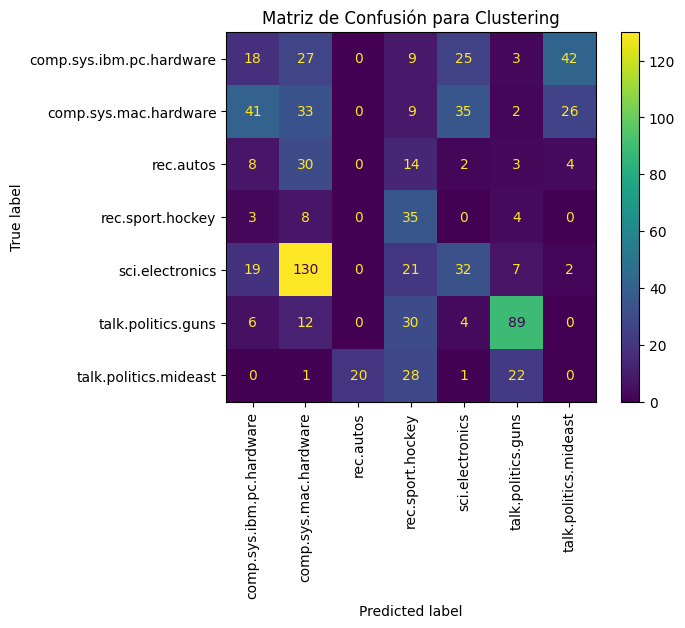

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_confusion_matrix(labels_true, labels_pred):
    conf_matrix = confusion_matrix(labels_true, labels_pred, labels=np.unique(labels_true))
    # Visualizar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(label_encoder.inverse_transform(labels_true)))
    disp.plot(cmap='viridis', xticks_rotation='vertical')
    plt.title("Matriz de Confusión para Clustering")
    plt.show()

show_confusion_matrix(labels_true, labels_pred)

## K-means con wprd2vec

In [23]:
# Ajustar KMeans con inicialización mejorada
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=50, max_iter=300, random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = kmeans.fit_predict(return_vectors("word2vec"))

# Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Calcular métricas de evaluación
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Shape de la matriz de vectores de documentos: (805, 200)
Precisión: 0.499
Cobertura: 0.540
Medida-F (Bcubed): 0.494


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


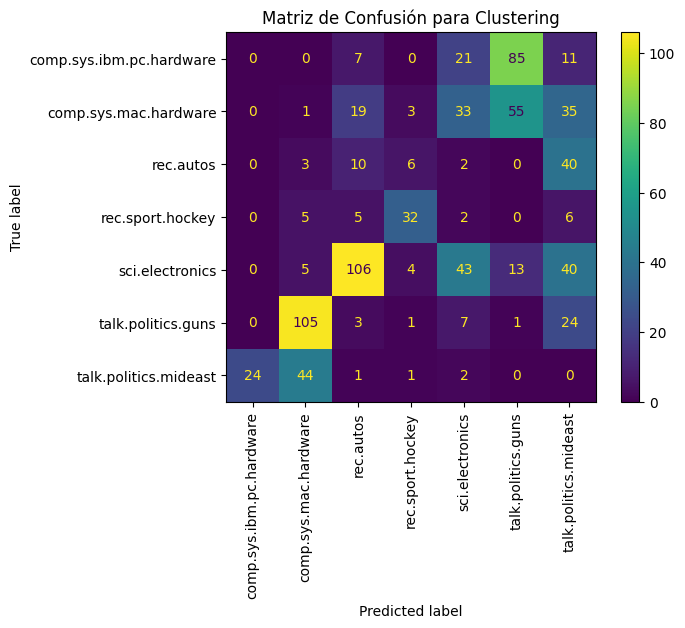

In [24]:
show_confusion_matrix(labels_true, labels_pred)

## K-means con aditivo

In [25]:
# Ajustar KMeans con inicialización mejorada
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=200, max_iter=500, random_state=42, algorithm='elkan')

# Ajustamos el modelo a los vectores de los documentos
labels_pred = kmeans.fit_predict(return_vectors("aditive"))

# Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Calcular métricas de evaluación
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Precisión: 0.508
Cobertura: 0.502
Medida-F (Bcubed): 0.474


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


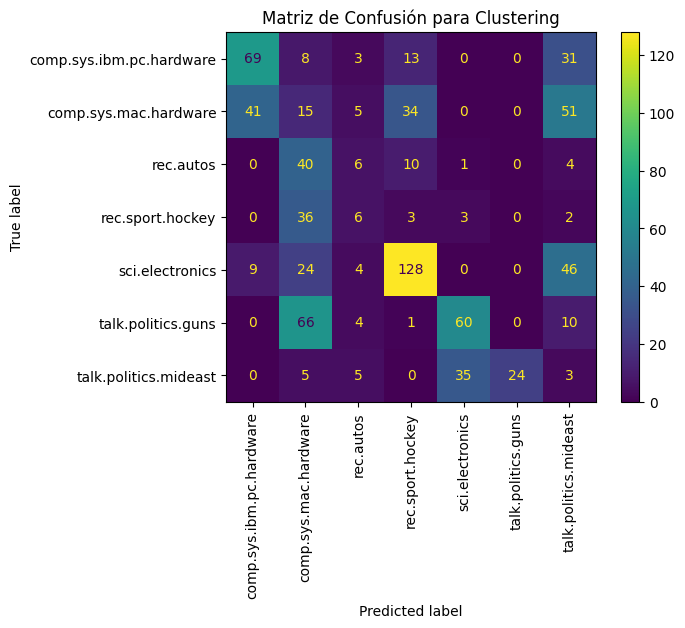

In [26]:
show_confusion_matrix(labels_true, labels_pred)

## K-means con media

In [27]:
# Ajustar KMeans con inicialización mejorada
kmeans = KMeans(n_clusters=true_k, init='k-means++', n_init=50, max_iter=300, random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = kmeans.fit_predict(return_vectors("mean"))

# Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Calcular métricas de evaluación
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")

Precisión: 0.499
Cobertura: 0.540
Medida-F (Bcubed): 0.494


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


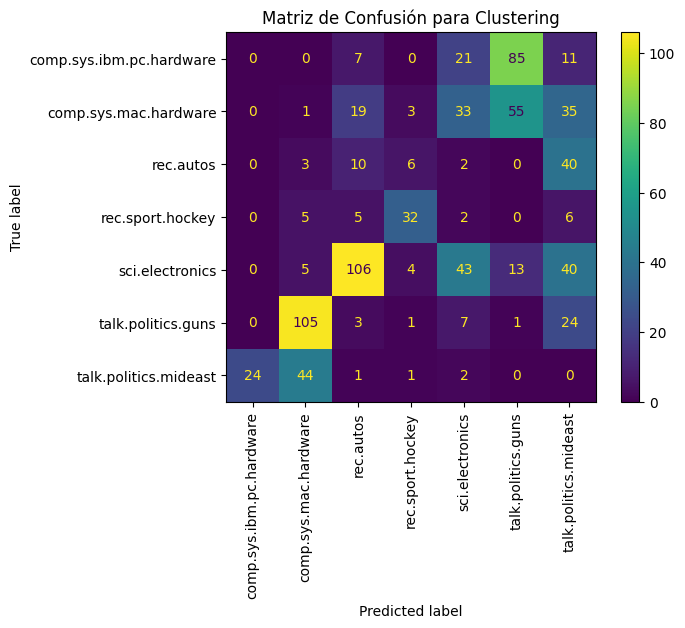

In [28]:
show_confusion_matrix(labels_true, labels_pred)

# Gaussian Mixture Model (GMM)
## GMM tf-idf

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Paso 1: Ajustar Gaussian Mixture Model
# 'true_k' es el número de clusters reales, 'doc_vectors' es la matriz de vectores de documentos
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = gmm.fit_predict(return_vectors("tfidf_matrix"))

# Paso 2: Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

# Aquí mapeamos cada cluster a la etiqueta más frecuente dentro de ese cluster
for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Paso 3: Calcular las métricas de evaluación
# Calculamos precisión, recall y f1-score usando 'cluster_labels' (etiquetas asignadas por el clustering)
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.328
Cobertura: 0.401
Medida-F (Bcubed): 0.334


/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


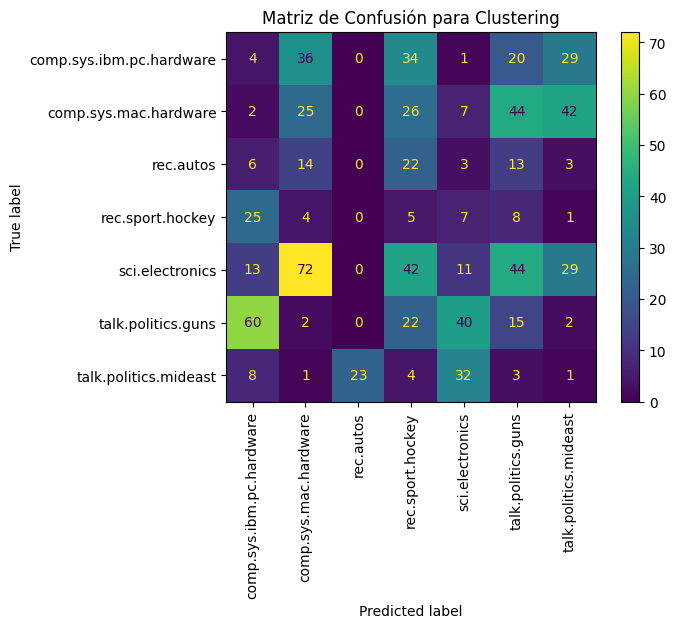

In [30]:
show_confusion_matrix(labels_true, labels_pred)

## GMM word2vec

In [31]:
# Paso 1: Ajustar Gaussian Mixture Model
# 'true_k' es el número de clusters reales, 'doc_vectors' es la matriz de vectores de documentos
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = gmm.fit_predict(return_vectors("word2vec"))

# Paso 2: Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

# Aquí mapeamos cada cluster a la etiqueta más frecuente dentro de ese cluster
for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Paso 3: Calcular las métricas de evaluación
# Calculamos precisión, recall y f1-score usando 'cluster_labels' (etiquetas asignadas por el clustering)
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Shape de la matriz de vectores de documentos: (805, 200)
Precisión: 0.616
Cobertura: 0.539
Medida-F (Bcubed): 0.548


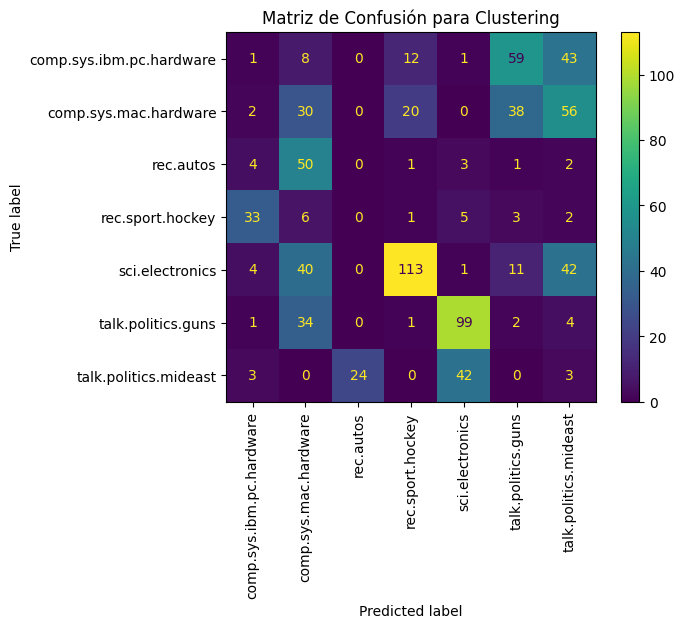

In [32]:
show_confusion_matrix(labels_true, labels_pred)

## GMM aditive

In [33]:
# Paso 1: Ajustar Gaussian Mixture Model
# 'true_k' es el número de clusters reales, 'doc_vectors' es la matriz de vectores de documentos
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = gmm.fit_predict(return_vectors("aditive"))

# Paso 2: Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

# Aquí mapeamos cada cluster a la etiqueta más frecuente dentro de ese cluster
for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Paso 3: Calcular las métricas de evaluación
# Calculamos precisión, recall y f1-score usando 'cluster_labels' (etiquetas asignadas por el clustering)
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.607
Cobertura: 0.533
Medida-F (Bcubed): 0.543


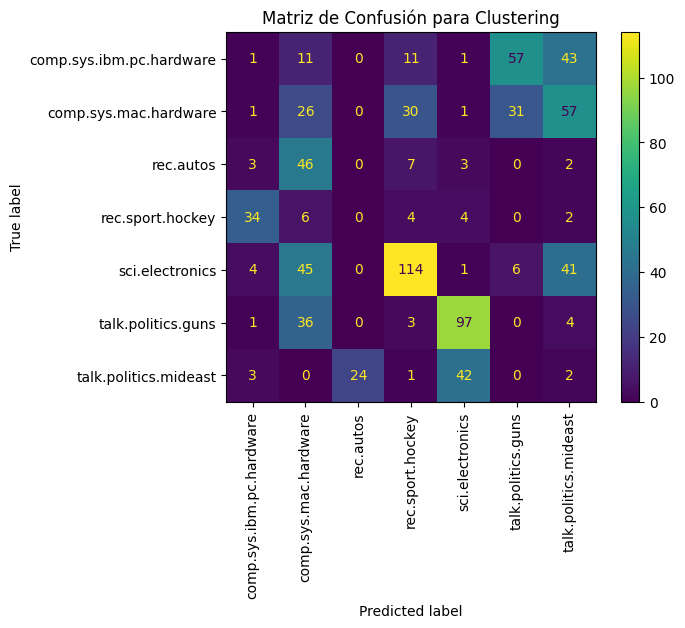

In [34]:
show_confusion_matrix(labels_true, labels_pred)

## GMM mean

In [35]:
# Paso 1: Ajustar Gaussian Mixture Model
# 'true_k' es el número de clusters reales, 'doc_vectors' es la matriz de vectores de documentos
gmm = GaussianMixture(n_components=true_k, covariance_type='full', random_state=42)

# Ajustamos el modelo a los vectores de los documentos
labels_pred = gmm.fit_predict(return_vectors("mean"))

# Paso 2: Mapear las etiquetas de los clusters a las etiquetas reales
cluster_labels = np.zeros_like(labels_pred)

# Aquí mapeamos cada cluster a la etiqueta más frecuente dentro de ese cluster
for cluster in range(true_k):
    mask = (labels_pred == cluster)
    if np.sum(mask) == 0:  # Si el cluster está vacío, saltamos
        continue
    cluster_labels[mask] = np.bincount(labels_true[mask]).argmax()

# Paso 3: Calcular las métricas de evaluación
# Calculamos precisión, recall y f1-score usando 'cluster_labels' (etiquetas asignadas por el clustering)
precision = precision_score(labels_true, cluster_labels, average='weighted')
recall = recall_score(labels_true, cluster_labels, average='weighted')
f1 = f1_score(labels_true, cluster_labels, average='weighted')

# Mostrar las métricas
print(f"Precisión: {precision:.3f}")
print(f"Cobertura: {recall:.3f}")
print(f"Medida-F (Bcubed): {f1:.3f}")


Precisión: 0.616
Cobertura: 0.539
Medida-F (Bcubed): 0.548


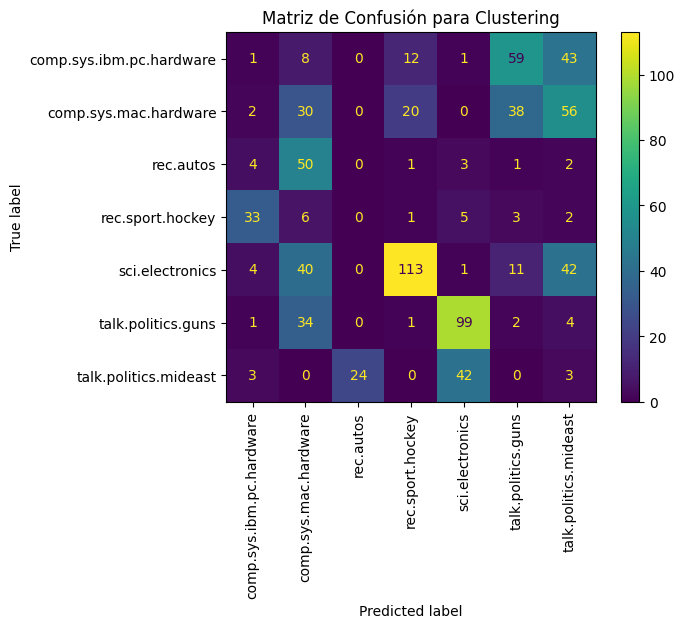

In [36]:
show_confusion_matrix(labels_true, labels_pred)